### Tic-Tac-Toe Endgame Data Set
Abstract: Binary classification task on possible configurations of tic-tac-toe game

Source:

Creator:

David W. Aha (aha '@' cs.jhu.edu)

Donor:

David W. Aha (aha '@' cs.jhu.edu)


Data Set Information:

This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first. The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row").

Attribute Information:

1. top-left-square: {x,o,b}
2. top-middle-square: {x,o,b}
3. top-right-square: {x,o,b}
4. middle-left-square: {x,o,b}
5. middle-middle-square: {x,o,b}
6. middle-right-square: {x,o,b}
7. bottom-left-square: {x,o,b}
8. bottom-middle-square: {x,o,b}
9. bottom-right-square: {x,o,b}
10. Class: {positive,negative}

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


%matplotlib inline

In [3]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [4]:
ds = pd.read_csv('D:\\xxx\\tic-tac-toe-endgame.csv', sep=',')
ds.head()

nrows, ncols = ds.shape
print(f'The dataset has endgame results for {nrows} games, with {ncols} attributes')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


The dataset has endgame results for 958 games, with 10 attributes


In [5]:
ds.rename(columns={'V1':'TopL', 'V2':'TopM','V3':'TopR','V4':'MidL','V5':'MidM',\
                               'V6':'MidR','V7':'BotL','V8':'BotM','V9':'BotR'}, inplace=True)
ds.head(2)

,TopL,TopM,TopR,MidL,MidM,MidR,BotL,BotM,BotR,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive


In [6]:
# Integer encoding the target column
int_encode=LabelEncoder()

ds['Outcome'] = int_encode.fit_transform(ds['V10'])
ds.drop(columns={'V10'}, inplace=True)
ds.head()
ds.tail()

,TopL,TopM,TopR,MidL,MidM,MidR,BotL,BotM,BotR,Outcome
0,x,x,x,x,o,o,x,o,o,1
1,x,x,x,x,o,o,o,x,o,1
2,x,x,x,x,o,o,o,o,x,1
3,x,x,x,x,o,o,o,b,b,1
4,x,x,x,x,o,o,b,o,b,1


,TopL,TopM,TopR,MidL,MidM,MidR,BotL,BotM,BotR,Outcome
953,o,x,x,x,o,o,o,x,x,0
954,o,x,o,x,x,o,x,o,x,0
955,o,x,o,x,o,x,x,o,x,0
956,o,x,o,o,x,x,x,o,x,0
957,o,o,x,x,x,o,o,x,x,0


In [ ]:
# import seaborn as sns
# missing = ds.isna()
# sns.heatmap(missing)

In [8]:
# Onehot encode all dependent categorical variables

X_encoded = pd.get_dummies(ds.iloc[:,0:9])
df = pd.concat([X_encoded, ds.iloc[:,9]], axis = 1)
df.head()

,TopL_b,TopL_o,TopL_x,TopM_b,TopM_o,TopM_x,TopR_b,TopR_o,TopR_x,MidL_b,MidL_o,MidL_x,MidM_b,MidM_o,MidM_x,MidR_b,MidR_o,MidR_x,BotL_b,BotL_o,BotL_x,BotM_b,BotM_o,BotM_x,BotR_b,BotR_o,BotR_x,Outcome
0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1
1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1
3,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1


In [9]:
# Since get_dummies creates as many columns as there are categories, dropping one category from each feature
# Removing every third column

df.drop(df.columns[[i*3 for i in range(9)]],axis = 1, inplace=True)
df.shape

(958, 19)

In [ ]:
# sns.heatmap(df.iloc[:,0:18].corr())

In [11]:
X = df.iloc[:,0:18]
y = df.iloc[:,18]

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 2468)

In [12]:
logreg = LogisticRegression()

model = logreg.fit(X_train, y_train)
model.score(X_train, y_train)

0.9776119402985075

In [13]:
y_pred = model.predict(X_test)

print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 score: ", metrics.f1_score(y_test, y_pred))

Accuracy score:  0.9791666666666666
Precision:  0.9796954314720813
Recall:  0.9897435897435898
F1 score:  0.9846938775510204


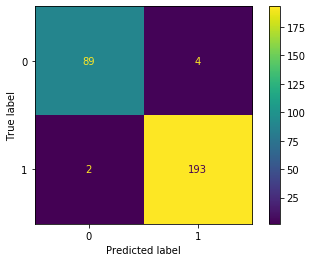

In [14]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test,y_test)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

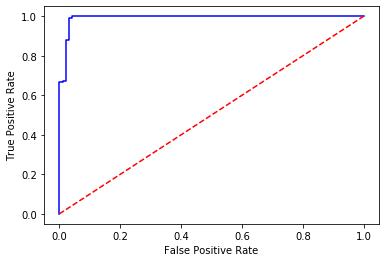

In [15]:
from sklearn.metrics import roc_curve

probs = model.predict_proba(X_test)
probs_f = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, probs_f)

roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')